In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm

In [5]:
for i in tqdm(range(10000)):
    j = i
    #print(i)

100%|██████████| 10000/10000 [00:00<00:00, 748889.25it/s]


In [38]:
class MyRandom():
    def __init__(self, seed = 15, method='simple'):
        self.r = seed
        self.method = method
        
        if method == 'simple':
            self.a = 57
            self.c = 1
            self.M = 265
        elif method == 'drand48':
            self.a = int('5DEECE66D',16)
            self.c = int('B',16)
            self.M = 2**48
        else:
            print("Metodo no reconocido")
        
    def Random(self):
            
        r = (self.a*self.r + self.c)%self.M
        self.r = r 
        #print(self.a)
        return r / float(self.M)
    
    def TestMethod(self, Npoints, moment, seed_ = 32, method_ = 'simple'):
        
        rand = MyRandom(seed = seed_, method = method_)
        array = np.zeros(Npoints)
        
        for i in range(Npoints):
            array[i] = rand.Random()
            
        return np.sqrt(Npoints)* np.abs( np.mean(array**moment) - 1./(moment+1) )

In [34]:
# Vamos a crear una funcion de llenado

def FillPoints( seed_, method_, Npoints):
    
    rand = MyRandom(seed = seed_, method = method_)
    
    points = np.zeros(Npoints)
    
    for i in tqdm(range(Npoints)):
        points[i] = rand.Random()
        
    return points

In [35]:
Npoints = 5000
Nsimple = FillPoints(165, "simple", Npoints)
Nrand48 = FillPoints(630, "drand48", Npoints)

100%|██████████| 5000/5000 [00:00<00:00, 142722.63it/s]


In [27]:
#print(Nrand48)

indices = np.arange(Npoints)
Even = (indices%2) == 0
print(Even)

[ True False  True ... False  True False]


Text(0,0.5,'Numero aleatorio')

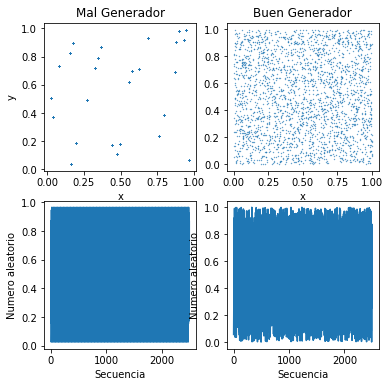

In [37]:
fig = plt.figure(figsize = (6,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.scatter(Nsimple[Even], Nsimple[~Even], s = 0.1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.title.set_text('Mal Generador')

ax2.scatter(Nrand48[Even], Nrand48[~Even], s = 0.1)
ax2.set_xlabel('x')
#ax2.set_ylabel('y')
ax2.title.set_text('Buen Generador')

ax3.plot(Nsimple[Even])
ax3.set_xlabel('Secuencia')
ax3.set_ylabel('Numero aleatorio')

ax4.plot(Nrand48[Even])
ax4.set_xlabel('Secuencia')
ax4.set_ylabel('Numero aleatorio')

In [43]:
# Probando nuestro generador de eventos

#rand = MyRandom(seed = 16, method= 'drand48')

#Mal generador
rand = MyRandom(seed = 16, method= 'simple')

moments = []

points = np.linspace(1,1e6,11)

for k in tqdm(range(4)):
    
    test = []
    for i in range(len(points)):
        test.append(rand.TestMethod(int(points[i]), k+1, 45, 'simple'))

    moments.append(test)

100%|██████████| 4/4 [00:27<00:00,  6.80s/it]


In [44]:
print(moments)

[[0.18301886792452826, 12.577571566814195, 17.784461184139953, 21.78154819359682, 25.150519048370672, 28.12022247422664, 30.80278652943466, 33.26988743680177, 35.56847937368043, 37.725355941107544, 39.76688679245255], [0.13318144060757087, 17.255258012593433, 24.399981359363963, 29.883435045706957, 34.50555848793794, 38.57954265162801, 42.260515489999804, 45.64583108310978, 48.79909957579176, 51.75863652905756, 54.55951800166148], [0.06863839276718359, 18.62204203737617, 26.333456303516787, 32.251128442106456, 37.23950389947975, 41.636078962030346, 45.60892794122782, 49.26266466859756, 52.66564792019686, 55.859826116923344, 58.88263327095539], [0.017636034305132914, 18.523238730494036, 26.194162307931318, 32.08035391957599, 37.04234971300612, 41.41552422707835, 45.36746262882565, 49.00194215358234, 52.38688658131658, 55.56422267655097, 58.571043788517464]]


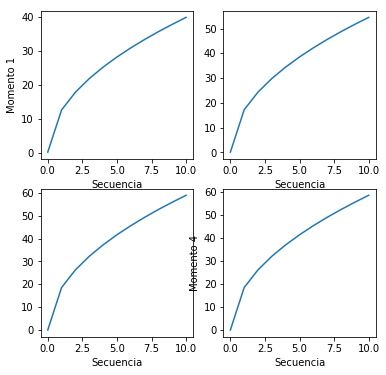

In [45]:
fig = plt.figure( figsize=(6,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(moments[0])
ax1.set_xlabel('Secuencia')
ax1.set_ylabel('Momento 1')

ax2.plot(moments[1])
ax2.set_xlabel('Secuencia')

ax3.plot(moments[2])
ax3.set_xlabel('Secuencia')
#ax3.set_ylabel('Momento 3')

ax4.plot(moments[3])
ax4.set_xlabel('Secuencia')
ax4.set_ylabel('Momento 4')

plt.show()

# Generacion de eventos usando numpy

In [50]:
x = np.random.rand()
print(x)

0.409230886103


In [54]:
vec = np.random.rand(3)
print(vec)

[0.2633792  0.66278761 0.2964783 ]


In [57]:
matrix = np.random.rand(2,3)
print(matrix)

[[0.50865832 0.39290062 0.16697751]
 [0.36183685 0.69636294 0.2438594 ]]


In [59]:
posiciones = []

for i in tqdm(range(10000)):
    posiciones.append( np.random.uniform(-1.,6.) )

100%|██████████| 10000/10000 [00:00<00:00, 156788.79it/s]


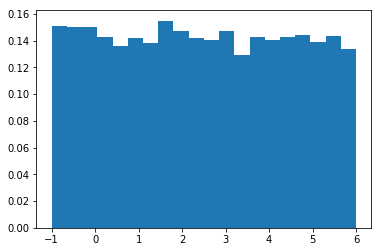

In [60]:
plt.hist(posiciones, 20, density=True)
plt.show()

## Distribuciones no uniformes

In [62]:
poisson = []
gauss = []

for i in range(1000):
    poisson = np.append(poisson, np.random.poisson())
    gauss = np.append(gauss, np.random.standard_normal())

Text(0.5,0,'$N$')

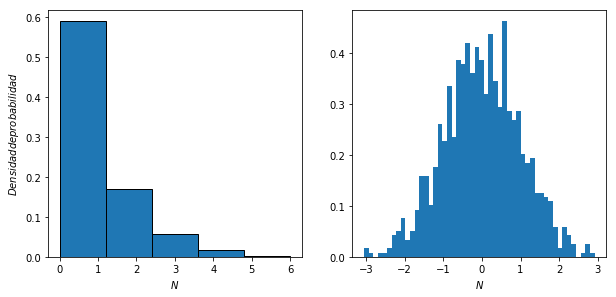

In [63]:
fig = plt.figure( figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

ax1.hist(poisson, bins=5, density=True, edgecolor='black')
ax1.set_xlabel(r'$N$')
ax1.set_ylabel(r'$Densidad de probabilidad$')

ax2.hist(gauss, bins=50, density=True)
ax2.set_xlabel(r'$N$')

# Método de inversión

$$ \frac{1}{\alpha} e^{-\frac{x}{\alpha}}  $$

In [64]:
def Function(x, alpha):
    if(alpha != 0):
        
        return -alpha*np.log(1.-x)
    
    else:
        return 0.

In [67]:
points = np.zeros(2000)

alpha = 50.
vectorexp = []

for i in range(2000):
    vectorexp = np.append(vectorexp, Function( np.random.rand(), alpha )  )

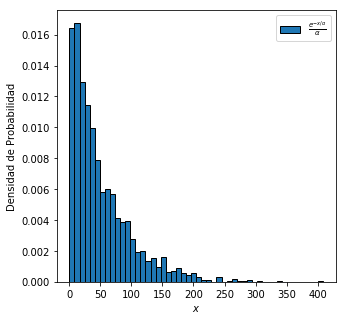

In [68]:
fig = plt.figure(figsize=(5,5))

plt.hist(vectorexp, 50, density=True,  alpha=1, edgecolor = 'black',  linewidth=1, label=r'$\frac{e^{-x /\alpha}}{\alpha}$')
plt.ylabel('Densidad de Probabilidad')
plt.xlabel(r'$x$')
plt.legend(loc=0)
plt.show()
